In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [ ]:
# Load development and test sets
dev_data = pd.read_csv('/content/credit_overdue_processed_smote_dev.csv')
test_data = pd.read_csv('/content/credit_overdue_processed_smote_test.csv')

In [ ]:
dev_data

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8,target_status_binary
0,0,5.126174e+06,0.00000,27000.000000,-14869.000000,-5067.000000,1.0,1.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,True,False,False,False,False,1.0
1,1,5.117643e+06,1.00000,135000.000000,-11101.000000,-96.000000,1.0,1.00000,0.00000,0.00000,3.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
2,2,5.113723e+06,0.00000,90000.000000,-19551.000000,-1927.000000,1.0,0.00000,1.00000,1.00000,2.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
3,3,5.091170e+06,0.00000,81000.000000,-9796.000000,-292.000000,1.0,1.00000,0.00000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.00000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,0.0
4,4,5.044667e+06,0.00000,76500.000000,-22302.000000,0.000000,1.0,0.00000,0.00000,0.00000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,False,False,False,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,49347,5.024389e+06,0.00000,117000.000000,-13494.000000,-1281.000000,1.0,0.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,False,True,False,False,False,False,False,False,False,1.0
49348,49348,5.023287e+06,0.00000,153873.589613,-22281.437370,-210.826293,1.0,0.00000,0.00000,0.00000,2.00000,0.805869,0.805869,0.194131,1.000000,0.000000,0.805869,0.194131,0.194131,0.805869,0.0,0.0,0.00000,0.0,0.194131,0.0,0.805869,0.000000,0.194131,0.805869,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,True,False,False,False,False,False,True,1.0
49349,49349,5.024022e+06,1.69826,315000.000000,-12122.000699,-1478.087007,1.0,0.00000,0.69826,0.00000,3.69826,0.000000,0.000000,1.000000,0.301740,0

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# the first column is an index and the second is just the ID, the last column is the target
X_train = dev_data.iloc[:, 2:-1].values
y_train = dev_data.iloc[:, -1].values

X_test = test_data.iloc[:, 2:-1].values
y_test = test_data.iloc[:, -1].values

# No batch normalization/dropout, Weight value changed

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class TabularModel(nn.Module):
    def __init__(self, num_features, num_classes, hidden1=64, hidden2=128, hidden3=128):
        super(TabularModel, self).__init__()
        self.layer1 = nn.Linear(num_features, hidden1)
        self.layer2 = nn.Linear(hidden1, hidden2)
        self.layer3 = nn.Linear(hidden2, hidden3)
        self.layer_out = nn.Linear(hidden3, num_classes)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        #x = self.dropout(x)
        x = self.relu(self.layer3(x))
        #x = self.dropout(x)
        x = self.layer_out(x)
        return x

model = TabularModel(num_features=X_train.shape[1], num_classes=1)

criterion = nn.BCEWithLogitsLoss()
weight_value = 3 #give more weight to minority class
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight_value]))
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss/len(train_loader)}')

# Evaluating the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
    print(f'Train Loss: {train_loss.item()} Test Loss: {test_loss.item()}')

y_pred_test = torch.sigmoid(y_pred_test)
y_pred_tag = torch.round(y_pred_test)

Epoch 1/100 Loss: 0.8601760854606801
Epoch 2/100 Loss: 0.7071464362848608
Epoch 3/100 Loss: 0.6322473458115764
Epoch 4/100 Loss: 0.582598082412401
Epoch 5/100 Loss: 0.549821205089747
Epoch 6/100 Loss: 0.523330155895164
Epoch 7/100 Loss: 0.4983217387310582
Epoch 8/100 Loss: 0.48188457555026587
Epoch 9/100 Loss: 0.46608120969308475
Epoch 10/100 Loss: 0.45453431190913207
Epoch 11/100 Loss: 0.4406580080138278
Epoch 12/100 Loss: 0.4327380706512712
Epoch 13/100 Loss: 0.4266057890198082
Epoch 14/100 Loss: 0.4146614823818516
Epoch 15/100 Loss: 0.4078696832794291
Epoch 16/100 Loss: 0.4018401270973559
Epoch 17/100 Loss: 0.39284878691243386
Epoch 18/100 Loss: 0.38905019757043513
Epoch 19/100 Loss: 0.38393963751783644
Epoch 20/100 Loss: 0.3790305565675923
Epoch 21/100 Loss: 0.36972494768895636
Epoch 22/100 Loss: 0.36892741175435984
Epoch 23/100 Loss: 0.36630534298640766
Epoch 24/100 Loss: 0.3666432542929069
Epoch 25/100 Loss: 0.3546881428171779
Epoch 26/100 Loss: 0.35172743180409616
Epoch 27/100 L

Accuracy: 0.7940166046378471
Precision: 0.2926666666666667
Recall: 0.5373317013463892
F1 Score: 0.37893828226154513
ROC-AUC : 0.6826713621013029


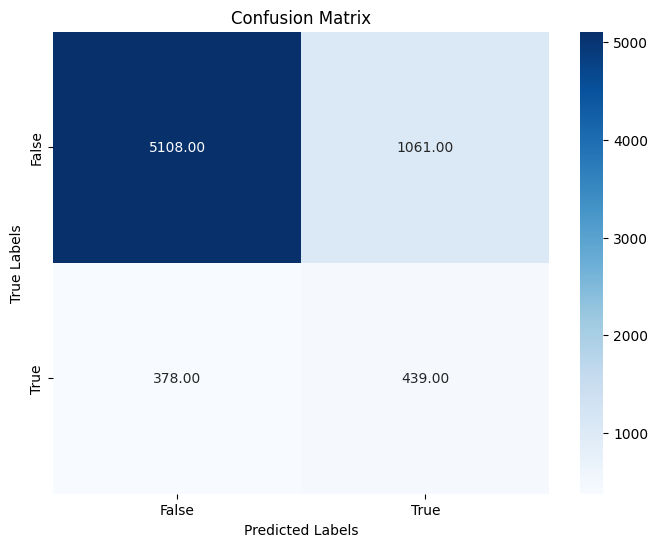

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
y_true = y_test_tensor.numpy()
y_pred = y_pred_tag.numpy()


cm = confusion_matrix(y_true, y_pred)

# Print accuracy, precision, recall, and F1 score
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(f'Precision: {precision_score(y_true, y_pred)}')
print(f'Recall: {recall_score(y_true, y_pred)}')
print(f'F1 Score: {f1_score(y_true, y_pred)}')
print(f'ROC-AUC : {roc_auc_score(y_true, y_pred)}')


fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='.2f')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

# Batch Normalization/dropout

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the  model
class TabularModel(nn.Module):
    def __init__(self, num_features, num_classes, hidden1=64, hidden2=128, hidden3=128):
        super(TabularModel, self).__init__()
        self.layer1 = nn.Linear(num_features, hidden1)
        self.layer2 = nn.Linear(hidden1, hidden2)
        self.layer3 = nn.Linear(hidden2, hidden3)
        self.layer_out = nn.Linear(hidden3, num_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(hidden1)
        self.batchnorm2 = nn.BatchNorm1d(hidden2)
        self.batchnorm3 = nn.BatchNorm1d(hidden3)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.batchnorm1(x)
        x = self.relu(self.layer2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

model = TabularModel(num_features=X_train.shape[1], num_classes=1)

#criterion = nn.BCEWithLogitsLoss()
weight_value = 3
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight_value]))
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss/len(train_loader)}')

model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
    print(f'Train Loss: {train_loss.item()} Test Loss: {test_loss.item()}')

y_pred_test = torch.sigmoid(y_pred_test)
y_pred_tag = torch.round(y_pred_test)

Epoch 1/100 Loss: 0.8536737113805015
Epoch 2/100 Loss: 0.7014731297684457
Epoch 3/100 Loss: 0.6520345300590437
Epoch 4/100 Loss: 0.620335989665491
Epoch 5/100 Loss: 0.5998124149024795
Epoch 6/100 Loss: 0.5819548161536301
Epoch 7/100 Loss: 0.566285489175295
Epoch 8/100 Loss: 0.5520376746055375
Epoch 9/100 Loss: 0.5469905879985483
Epoch 10/100 Loss: 0.5328536271817326
Epoch 11/100 Loss: 0.5251568484993487
Epoch 12/100 Loss: 0.5210419358984794
Epoch 13/100 Loss: 0.5099068745160041
Epoch 14/100 Loss: 0.5069918388143723
Epoch 15/100 Loss: 0.49933701398459124
Epoch 16/100 Loss: 0.4979158840069808
Epoch 17/100 Loss: 0.49087730835679283
Epoch 18/100 Loss: 0.48517378475613543
Epoch 19/100 Loss: 0.4787172790944885
Epoch 20/100 Loss: 0.47808648678691273
Epoch 21/100 Loss: 0.47160154223982537
Epoch 22/100 Loss: 0.4756875013826425
Epoch 23/100 Loss: 0.46592644063533895
Epoch 24/100 Loss: 0.46334171250771367
Epoch 25/100 Loss: 0.4592607511506643
Epoch 26/100 Loss: 0.4563726413358061
Epoch 27/100 Los

Accuracy: 0.7845691382765531
Precision: 0.2766233766233766
Recall: 0.5214198286413708
F1 Score: 0.36147645311837073


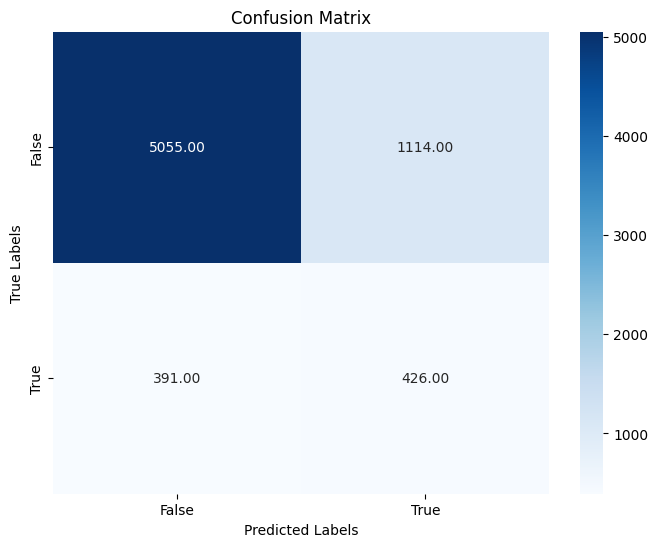

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
y_true = y_test_tensor.numpy()
y_pred = y_pred_tag.numpy()


cm = confusion_matrix(y_true, y_pred)

# Print accuracy, precision, recall, and F1 score
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(f'Precision: {precision_score(y_true, y_pred)}')
print(f'Recall: {recall_score(y_true, y_pred)}')
print(f'F1 Score: {f1_score(y_true, y_pred)}')


fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='.2f')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Load development and test sets
dev_data = pd.read_csv('/content/credit_overdue_processed_smote_dev.csv')
test_data = pd.read_csv('/content/credit_overdue_processed_smote_test.csv')
# the first column is an index and the second is just the ID, the last column is the target
X_dev = dev_data.iloc[:, 2:-1].values
y_dev = dev_data.iloc[:, -1].values

X_test = test_data.iloc[:, 2:-1].values
y_test = test_data.iloc[:, -1].values
X_test


array([[0.0, 108000.0, -16416.0, ..., False, False, False],
       [0.0, 67500.0, -20371.0, ..., False, False, True],
       [0.0, 121500.0, -21366.0, ..., False, False, True],
       ...,
       [0.0, 121500.0, -20602.0, ..., False, False, False],
       [0.0, 315000.0, -15653.0, ..., False, False, False],
       [1.0, 157500.0, -9529.0, ..., False, False, False]], dtype=object)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:



# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_dev_scaled, y_dev)

# Make prediction on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')

Accuracy: 0.8726023475522473
Precision: 0.1588785046728972
Recall: 0.0208078335373317
ROC-AUC: 0.5031093795665261
F1 Score: 0.03679653679653679


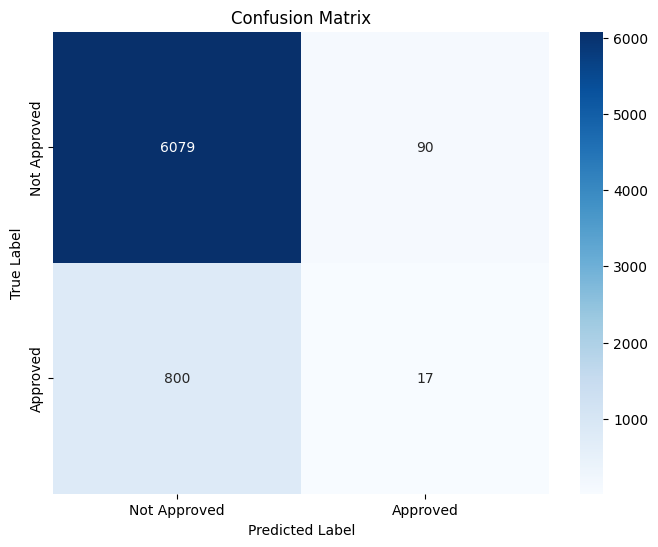

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Decision tree

In [ ]:
# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_dev_scaled, y_dev)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f'Accuracy (Decision Tree): {accuracy_dt}')
print(f'Precision (Decision Tree): {precision_dt}')
print(f'Recall (Decision Tree): {recall_dt}')
print(f'ROC-AUC (Decision Tree): {roc_auc_dt}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')

Accuracy (Decision Tree): 0.8542799885485256
Precision (Decision Tree): 0.3754646840148699
Recall (Decision Tree): 0.3708690330477356
ROC-AUC (Decision Tree): 0.6445851081918853
F1 Score: 0.3898963730569948


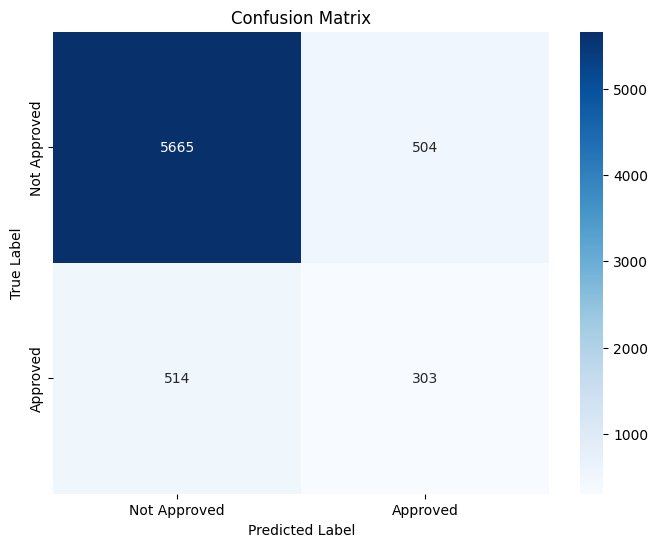

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_dev_scaled, y_dev)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print(f'Precision (Random Forest): {precision_rf}')
print(f'Recall (Random Forest): {recall_rf}')
print(f'ROC-AUC (Random Forest): {roc_auc_rf}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')

Accuracy (Random Forest): 0.8651588892069854
Precision (Random Forest): 0.4140302613480055
Recall (Random Forest): 0.3684210526315789
ROC-AUC (Random Forest): 0.6496830502256614
F1 Score: 0.3898963730569948


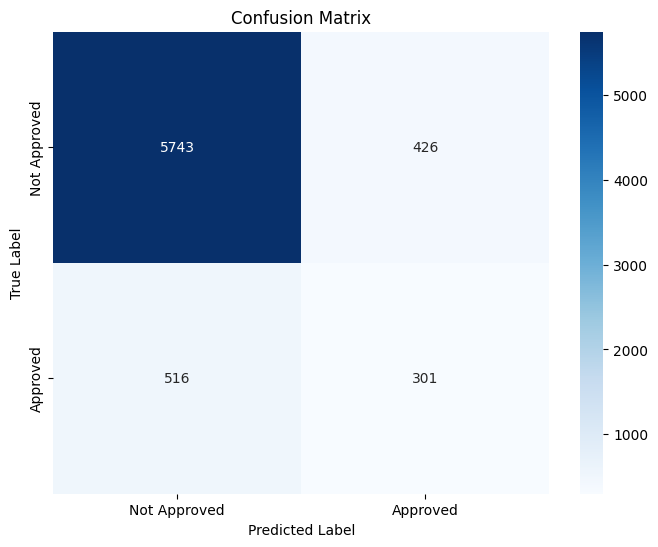

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Modified RF


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Train the Random Forest model with class weight balanced
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

rf_model.fit(X_dev_scaled, y_dev)

# Make predictions on the test data
#  to adjust the threshold for predictions,  need the predicted probabilities
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
threshold = 0.25  #  adjust the threshold
y_pred_rf = (y_pred_proba_rf >= threshold).astype(int)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print(f'Precision (Random Forest): {precision_rf}')
print(f'Recall (Random Forest): {recall_rf}')
print(f'ROC-AUC (Random Forest): {roc_auc_rf}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')


Accuracy (Random Forest): 0.826796450042943
Precision (Random Forest): 0.3408906882591093
Recall (Random Forest): 0.5152998776009792
ROC-AUC (Random Forest): 0.6916749023278036
F1 Score: 0.4103313840155945


# New Section

In [ ]:
# Train the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_dev_scaled, y_dev)

# Make predictions on the test data
y_pred_gbm = gbm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm)

print(f'Accuracy (GBM): {accuracy_gbm}')
print(f'Precision (GBM): {precision_gbm}')
print(f'Recall (GBM): {recall_gbm}')
print(f'ROC-AUC (GBM): {roc_auc_gbm}')

Accuracy (GBM): 0.8823361007729745
Precision (GBM): 0.38095238095238093
Recall (GBM): 0.009791921664626682
ROC-AUC (GBM): 0.5038423054586709


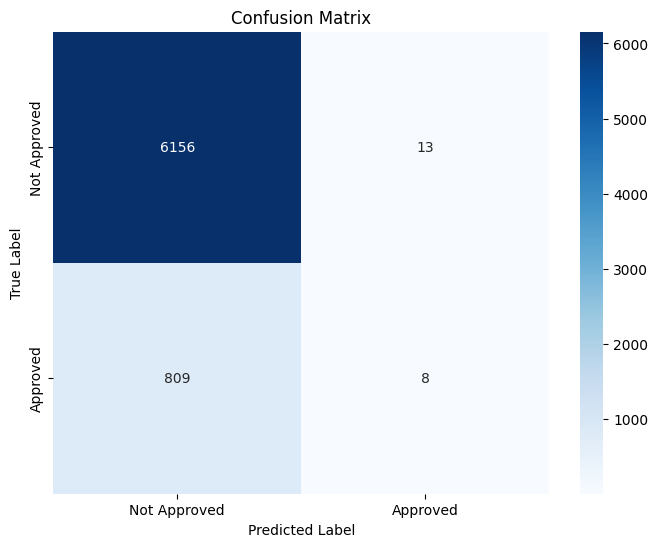

In [ ]:
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()